In [2]:
using Random, LinearAlgebra, Statistics, StatsBase, StatsPlots

In [3]:
N = 100
#A = [rand(1:N) for _ in 1:10]
A = sample(1:N, 10, replace=false)

function menor(A, m)
    A_m = []
    for a in A
        if a<m
            append!(A_m, a)
        end
    end
    return A_m
end

function mayor(A, m)
    A_m = []
    for a in A
        if a>m
            append!(A_m, a)
        end
    end
    return A_m
end

mayor (generic function with 1 method)

In [4]:
function r_select(A, k)
    
    # Caso base
    if size(A)[1] == 1
        return A[1]

    else
        # Elige un pivote al azar y separa
        p = rand(A)
        A_left = menor(A, p)
        A_right = mayor(A, p)
        
        # Localizacion del pivote respecto al arreglo
        l = size(A_left)[1]
        
        #println(p, "  ", l, "  ", k)
        
        # Elegir de acuerdo al pivote
        if k==l+1
            return p
        elseif k<=l
            return r_select(A_left, k)
        else
            return r_select(A_right, k - l - 1)
        end
    end
end

r_select (generic function with 1 method)

In [5]:
N = 10
L = [10, 100, 1000, 10000, 100000]

R = Array{Float64}(undef, size(L)[1], N)

i = 1

t = time_ns()

for l in L
    for n in 1:N
        S = sample(1:l*10, l, replace=false)
        t = time_ns()
        r_select(S, floor(l/2))
        R[i, n] = (time_ns() - t) * 1.0e-9
    end
    i += 1
end

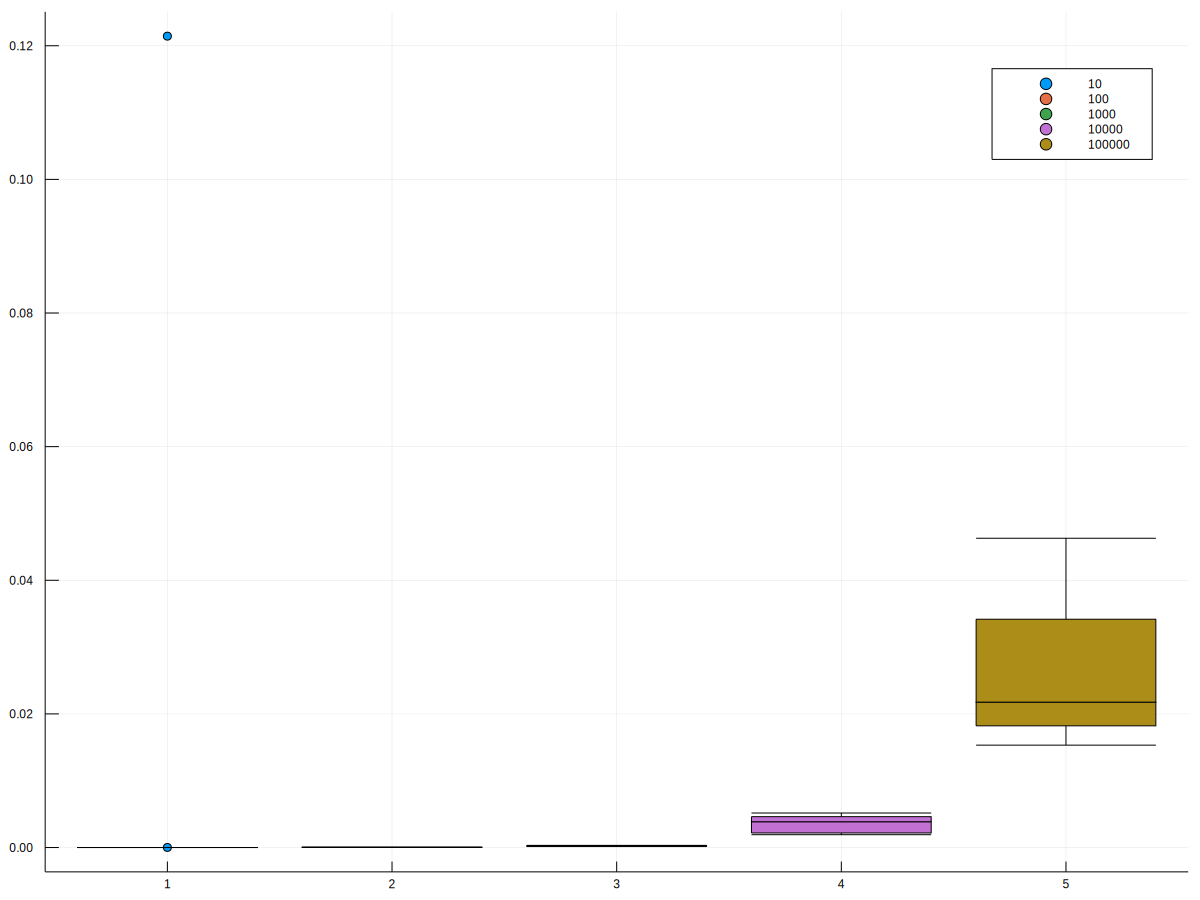

In [7]:
boxplot(permutedims(R),
        labels=permutedims([string(l) for l in L]),
        size=(1200, 900))